
 # Adaptación del Ejercicio 5.9.2, Map of Science 
## Se realiza una busqueda del tema de interes, Fusarium oxysporum.
    "Importamos los modules a usar desde PubMed."

In [54]:
%config IPCompleter.greedy=True

In [61]:
import re
import csv
import itertools

In [62]:
with open('pubmed-fusariumox-set.txt', encoding="utf8") as f:
    info = f.read()

In [66]:
# info
len (info)

33405

In [67]:
info = re.sub(r'\n\s{6}', ' ', info)


In [68]:
print(info[:2000])

PMID- 32692281
OWN - NLM
STAT- MEDLINE
DCOM- 20200903
LR  - 20210502
IS  - 0031-949X (Print)
IS  - 1943-7684 (Electronic)
IS  - 0031-949X (Linking)
VI  - 110
IP  - 9
DP  - 2020 Sep
TI  - Accessory Chromosomes in Fusarium oxysporum.
PG  - 1488-1496
LID - 10.1094/PHYTO-03-20-0069-IA [doi]
AB  - Most genomes within the species complex of Fusarium oxysporum are organized into two  compartments: the core chromosomes (CCs) and accessory chromosomes (ACs). As opposed  to CCs, which are conserved and vertically transmitted to carry out essential  housekeeping functions, lineage- or strain-specific ACs are believed to be initially  horizontally acquired through unclear mechanisms. These two genomic compartments are  different in terms of gene density, the distribution of transposable elements, and  epigenetic markers. Although common in eukaryotes, the functional importance of ACs  is uniquely emphasized among fungal species, specifically in relationship to fungal  pathogenicity and their adapt

In [59]:
codes = re.findall(r'AD.+, (.+[a-z-A-Z]).  ?Electronic|AD.+, (.+[a-z-A-Z]).  [^\s<>"]+@[^\s<>"]+|AD.+, (.+[a-z-A-Z]). [^\s<>"]+@[^\s<>"]+|AD.+,  ?(.+[a-z-A-Z]).?|', info)

basic_list = itertools.chain(*codes)
basic_list=list(basic_list)
basic_list

FR_List = [] 
for element in basic_list:
    if element not in FR_List:
        FR_List.append(element)

FR_List[:40]

['',
 'MA',
 'USA',
 'China',
 'United States',
 'Saudi Arabia',
 'Egypt',
 'India',
 'Turkey',
 'Italy',
 'Japan']

In [60]:
len(FR_List)

11

In [69]:
unique_zipcodes = list(set(FR_List))
unique_zipcodes.sort()
unique_zipcodes[:10]

['',
 'China',
 'Egypt',
 'India',
 'Italy',
 'Japan',
 'MA',
 'Saudi Arabia',
 'Turkey',
 'USA']

In [70]:
len(unique_zipcodes)

11

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
local = pd.read_csv('Lat_countries.csv', engine='python', skipfooter=3)
local.head(6)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania


In [78]:
local = local[local.name.isin(FR_List)]
local.head(10)

,country,latitude,longitude,name
45,CN,35.861660,104.195397,China
61,EG,26.820553,30.802498,Egypt
102,IN,20.593684,78.962880,India
107,IT,41.871940,12.567380,Italy
111,JP,36.204824,138.252924,Japan
189,SA,23.885942,45.079162,Saudi Arabia
219,TR,38.963745,35.243322,Turkey
227,US,37.090240,-95.712891,United States


In [79]:
len(local) 

8

In [81]:
ubication =pd.concat([local]).drop_duplicates().sort_values('name')

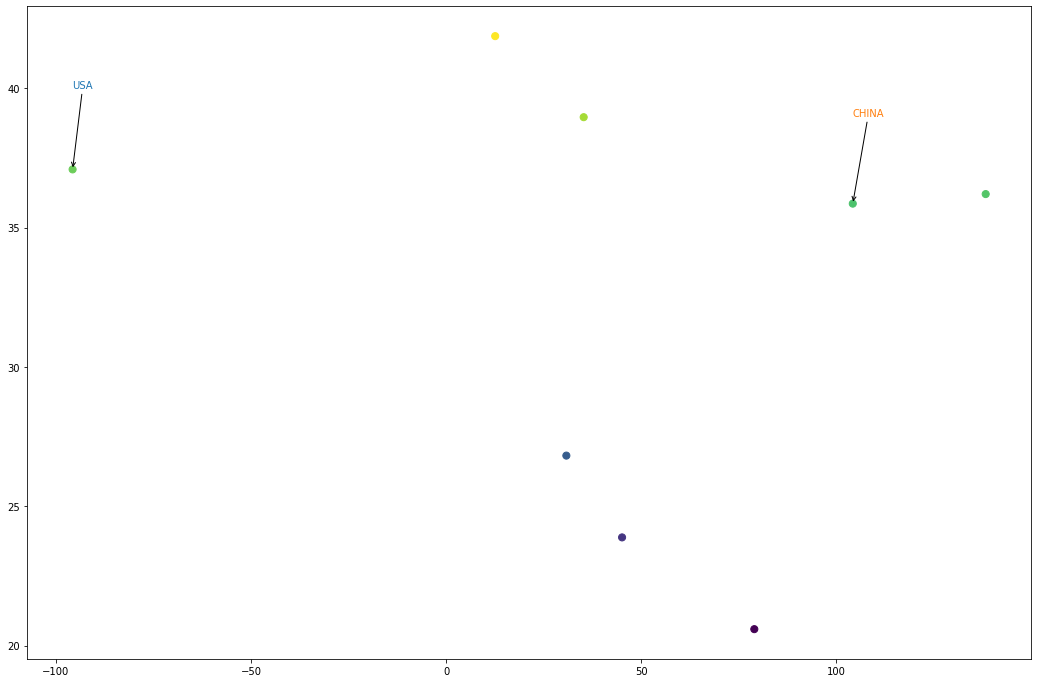

In [86]:
plt.scatter(ubication.longitude, ubication.latitude, s=50, c=ubication.latitude)

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard,color = 'tab:blue')
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard,color = 'tab:green')
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard,color = 'tab:grey')
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard,color = 'tab:orange')
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard,color = 'tab:pink')
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard,color = 'tab:red')

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

-Nota:
    "El mapa quedo muy disante porque la muestra fue pequeña, el listado fue de apenas 11 paises para autores que reportaron sobre Fusarium oxysporum (Tema de interes), sin embargo, si la muestra hubiera sido mas grande se podría apreciar mucho mejor la distribución."